In [1]:
using Pkg
Pkg.activate("..")
using Revise
using PythonPlot
PythonPlot.svg(true)
using SizeStructuredPopulations
using SpecialFunctions

methods(generate_cell)

  Activating project at `~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations`
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


# 1 method for generic function "generate_cell" from SizeStructuredPopulations:
 [1] generate_cell(model::GrowthModel, init::Vector{Float64}, Tmax::Float64; dt)
     @ ~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/src/model.jl:26

In [ ]:
λ(x) = 1.0 + max(0.1*sum(x),-0.9)
α = 0.5
σY = 0.05

# leads to gaussian division distribution 
function β(x, z, t)
    y0 = z[1]- z[2]
    μ = log(2) - α * y0
    A = exp(-((z[1] - μ)^2) / (2 * σY^2))/(2 * π * σY^2)^(1/2)
    B = (1 - erf((z[1] - μ) / (sqrt(2) * σY)))
    return  λ(x)*A / B
end

# symmetric division 
h(z, x) = ([z[1] - log(2),0],x)

# OU process dynamics of x
L(x, t, dt) = -1 .*x*dt .+ sqrt(dt) .*randn(3)

model = GrowthModel(λ, β, h, L)
init = vcat([0.0], [0.0, 0.0], zeros(3))


cell = generate_cell(model, init,10.0,dt = 0.01);
root = simulate_lineage(model, 100., init, dt = 0.01);
df = lineage_to_dataframe(root);

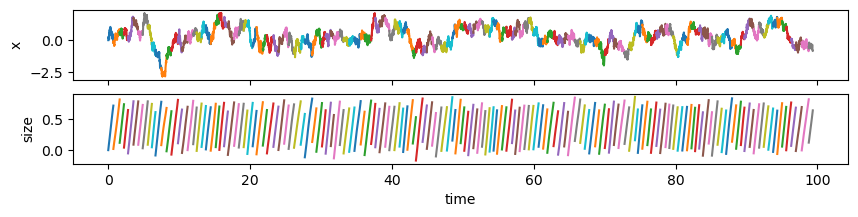

In [6]:
fig, axs = subplots(figsize=(10,2),nrows=2,sharex=true)


ax = axs[0]

data = root
while data.daughterL !== nothing
    ax.plot(data.time,[x[1] for x in data.x])
    data = data.daughterL
end
ax.set_ylabel("x")

ax = axs[1]

data = root
while data.daughterL !== nothing
    ax.plot(data.time,[z[1] for z in data.z])
    data = data.daughterL
end

ax.set_xlabel("time")
ax.set_ylabel("size")
fig  

In [ ]:
fig,ax = subplots(figsize=(5,5))
ax.plot